# Pandas

Tratamento de series e Dataframes

## Series
array unidimencional com dados e labels

In [1]:
from pandas import Series

In [2]:
serie = Series([1,7,-5,3],['a','b','c','d'])

In [3]:
print(serie)

a    1
b    7
c   -5
d    3
dtype: int64


In [4]:
serie.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
#slicing pandas

In [6]:
serie[serie >= 3]

b    7
d    3
dtype: int64

In [7]:
'd' in serie

True

In [8]:
dic = {'Platão': -428 , 'Kant': 1724  , 'Schopenhauer':1788 , 'Sartre': 1905 }

In [9]:
filos = Series(dic)

In [10]:
filos

Platão          -428
Kant            1724
Schopenhauer    1788
Sartre          1905
dtype: int64

In [11]:
filosofos = ['Platão','Kant','Schopenhauer','Sartre','Confúcio']
filosAdd  = Series(dic , index=filosofos)

In [12]:
from pandas import isnull,notnull

In [13]:
isnull(filosAdd)

Platão          False
Kant            False
Schopenhauer    False
Sartre          False
Confúcio         True
dtype: bool

In [14]:
#Soma valores para os mesmos indices
filosResult = filos + filosAdd

In [15]:
filosResult

Confúcio           NaN
Kant            3448.0
Platão          -856.0
Sartre          3810.0
Schopenhauer    3576.0
dtype: float64

In [16]:
#nomenado objeto
filos.index.name = "Filosófos"
filos.name = "Filósofos/Ano de Nascimento"
print(filos)

Filosófos
Platão          -428
Kant            1724
Schopenhauer    1788
Sartre          1905
Name: Filósofos/Ano de Nascimento, dtype: int64


In [17]:
#Filosofos depois de cristo
filos[filos >=0]

Filosófos
Kant            1724
Schopenhauer    1788
Sartre          1905
Name: Filósofos/Ano de Nascimento, dtype: int64

## Dataframes

In [18]:
from pandas import DataFrame

In [19]:
data = {
    'Estado': ['DF', 'SC', 'GO', 'BA'],
    'Ano': [2002, 2003, 2004, 2006],
    'População': [3.5, 1.5, 1.7, 2.3]
}

In [20]:
pop_frame = DataFrame(data)

In [21]:
pop_frame

,Estado,Ano,População
0,DF,2002,3.5
1,SC,2003,1.5
2,GO,2004,1.7
3,BA,2006,2.3


In [22]:
pop_frame['Estado']

0    DF
1    SC
2    GO
3    BA
Name: Estado, dtype: object

In [23]:
pop_frame.index

RangeIndex(start=0, stop=4, step=1)

In [24]:
pop_frame.columns


Index(['Estado', 'Ano', 'População'], dtype='object')

In [25]:
pop_frame.values

array([['DF', 2002, 3.5],
       ['SC', 2003, 1.5],
       ['GO', 2004, 1.7],
       ['BA', 2006, 2.3]], dtype=object)

In [26]:
pop_frame.Ano

0    2002
1    2003
2    2004
3    2006
Name: Ano, dtype: int64

In [27]:
pop_frame[:2]

,Estado,Ano,População
0,DF,2002,3.5
1,SC,2003,1.5


## Numpy e Pandas

In [28]:
import numpy as np

In [29]:
estados = {
    'Estado': ['DF', 'SC', 'GO', 'BA'],
    'Ano': [2002, 2003, 2004, 2006],
    'Populacao': [3.5, 1.5, 1.7, 2.3]
}

In [30]:
estadosDebito = DataFrame(estados,columns=['Estado','Ano','Populacao','Debito'])

In [31]:
estadosDebito

,Estado,Ano,Populacao,Debito
0,DF,2002,3.5,NaN
1,SC,2003,1.5,NaN
2,GO,2004,1.7,NaN
3,BA,2006,2.3,NaN


In [32]:
estadosDebito.Debito = np.arange(4.)

In [33]:
estadosDebito

,Estado,Ano,Populacao,Debito
0,DF,2002,3.5,0.0
1,SC,2003,1.5,1.0
2,GO,2004,1.7,2.0
3,BA,2006,2.3,3.0


In [34]:
estadosDebito.describe()

,Ano,Populacao,Debito
count,4.000000,4.00,4.000000
mean,2003.750000,2.25,1.500000
std,1.707825,0.90,1.290994
min,2002.000000,1.50,0.000000
25%,2002.750000,1.65,0.750000
50%,2003.500000,2.00,1.500000
75%,2004.500000,2.60,2.250000
max,2006.000000,3.50,3.000000


In [35]:
estadosDebito.Debito < 2

0     True
1     True
2    False
3    False
Name: Debito, dtype: bool

In [36]:
estadosDebito.iloc[0]

Estado         DF
Ano          2002
Populacao     3.5
Debito          0
Name: 0, dtype: object

In [37]:
estadosDebito.head()

,Estado,Ano,Populacao,Debito
0,DF,2002,3.5,0.0
1,SC,2003,1.5,1.0
2,GO,2004,1.7,2.0
3,BA,2006,2.3,3.0


## Dataframes e CSV

In [38]:
from pandas import read_csv

In [39]:
salarios = read_csv('arquivos/salarios.csv', names=['name','position','departament','salary'])

In [40]:
salarios = salarios.drop(0)

In [41]:
#tirando cifrao do salario
salarios['salary'] = salarios['salary'].str.replace('$','')

In [42]:
salarios.head()

,name,position,departament,salary
1,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,88967.00
2,"AARON, JEFFERY M",POLICE OFFICER,POLICE,80778.00
3,"AARON, KARINA",POLICE OFFICER,POLICE,80778.00
4,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,84780.00
5,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,104736.00


In [43]:
salarios.describe()

,name,position,departament,salary
count,32181,32181,32181,32181
unique,31893,1094,35,1106
top,"PEREZ, JOSE A",POLICE OFFICER,POLICE,86520.00
freq,4,9489,13570,2497


In [44]:
from pandas import to_numeric
valor_salario_str  = salarios.salary
valor_salario = to_numeric(valor_salario_str)

In [45]:
type(valor_salario)

pandas.core.series.Series

In [46]:
valor_salario.describe()

count     32181.000000
mean      79167.525908
std       24462.356665
min           0.960000
25%       69888.000000
50%       83616.000000
75%       91764.000000
max      260004.000000
Name: salary, dtype: float64

In [47]:
valor_salario.apply(np.cumsum)

1         [88967.0]
2         [80778.0]
3         [80778.0]
4         [84780.0]
5        [104736.0]
            ...    
32178     [86520.0]
32179     [83616.0]
32180     [86520.0]
32181    [110352.0]
32182         [nan]
Name: salary, Length: 32182, dtype: object

## Time Series

Data frame com coluna de data e uma coluna de dado
Pode ser usado para cotação de produtos e ações 

In [48]:
from pandas import date_range
rng = date_range('1/1/2020', periods = 50, freq = 'M')

In [49]:
rng

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29'],
              dtype='datetime64[ns]', freq='M')

In [50]:
ts = Series(np.random.randint(0, 200, len(rng)), index= rng)

In [51]:
ts.head()

2020-01-31     79
2020-02-29    185
2020-03-31     66
2020-04-30     45
2020-05-31     34
Freq: M, dtype: int64

## Ploting

In [52]:
import matplotlib.pyplot as plt
from matplotlib import style

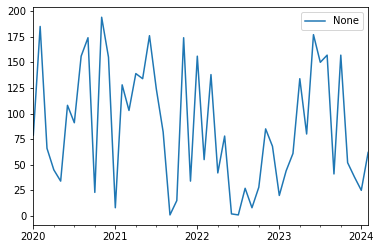

In [53]:
ts.cumsum()
plt.figure(); ts.plot();plt.legend(loc='best')

In [63]:
import os
if os.path.exists('arquivos/ts-output.xlsx'):
    os.remove('arquivos/ts-output.xlsx')

In [64]:
ts.to_excel('arquivos/ts-output.xlsx',sheet_name='time_series')

In [67]:
from pandas import read_excel
exc_ts = read_excel('arquivos/ts-output.xlsx', 'time_series', index_col = None, na_values = ['NA'])

In [68]:
exc_ts.head()

,Unnamed: 0,0
0,2020-01-31,79
1,2020-02-29,185
2,2020-03-31,66
3,2020-04-30,45
4,2020-05-31,34
